In [15]:
import os
from PIL import Image
from glob import glob
        
for dirname, _, filenames in os.walk('/imagedata'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


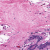

In [16]:
from PIL import Image

Image.open('imagedata/10253/0/10253_idx5_x1001_y1001_class0.png')

In [63]:
# get all of the file names
# use this to get cancer and benign images 
# then train test split
# Then transform to image array
# Then TRAIN!!!!
import keras
from tensorflow.keras.utils import load_img
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

nonCancer = glob('imagedata/*/0/*.png')
cancerous = glob('imagedata/*/1/*.png')
training = []
labels = []

for i in range(1, 1000):
    imageBenign = load_img(nonCancer[i])
    imageCancer = load_img(cancerous[i])
    imageBenign = imageBenign.resize([30, 30])
    imageCancer = imageCancer.resize([30, 30])
    benignArray = tf.keras.utils.img_to_array(imageBenign)
    cancerArray = tf.keras.utils.img_to_array(imageCancer)
    training.append(benignArray)
    labels.append(0)
    training.append(cancerArray)
    labels.append(1)
    


In [64]:
print(np.array(training).shape)
print(np.array(labels).shape)

(1998, 30, 30, 3)
(1998,)


Epoch 1/10
63/63 [==============================] - 1s 13ms/step - loss: 4.4019 - accuracy: 0.5305
Epoch 2/10
63/63 [==============================] - 1s 13ms/step - loss: 0.5955 - accuracy: 0.6867
Epoch 3/10
63/63 [==============================] - 1s 12ms/step - loss: 0.6239 - accuracy: 0.6802
Epoch 4/10
63/63 [==============================] - 1s 12ms/step - loss: 0.6024 - accuracy: 0.6797
Epoch 5/10
63/63 [==============================] - 1s 12ms/step - loss: 0.5376 - accuracy: 0.7257
Epoch 6/10
63/63 [==============================] - 1s 13ms/step - loss: 0.4979 - accuracy: 0.7683
Epoch 7/10
63/63 [==============================] - 1s 12ms/step - loss: 0.4419 - accuracy: 0.8003
Epoch 8/10
63/63 [==============================] - 1s 13ms/step - loss: 0.3993 - accuracy: 0.8243
Epoch 9/10
63/63 [==============================] - 1s 13ms/step - loss: 0.3996 - accuracy: 0.8263
Epoch 10/10
63/63 [==============================] - 1s 13ms/step - loss: 0.4192 - accuracy: 0.8138


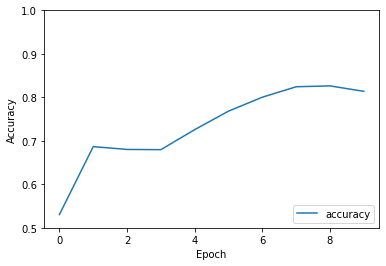

In [66]:
# define the model according to keras tutorial 
# https://www.tensorflow.org/tutorials/images/cnn#create_the_convolutional_base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(np.array(training), np.array(labels), epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [22]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


In [23]:
train_images

# https://www.geeksforgeeks.org/image-processing-with-keras-in-python/

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        